<h1 style="text-align: center; vertical-align: middle;">Numerical Methods of Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Lecture Series by Dr. Adrian Oeftiger</h2>

<h3 style="text-align: center; vertical-align: middle; margin-top: 1em; margin-bottom: 1em;">Guest Lecture by Dr. Michael Schenk</h3>

<img src="./img/etit.png" style="width: 20%; margin: auto;" />

<h3 style="text-align: center; vertical-align: middle;">Part 11: 20.01.2023</h3>

<h2>Run this notebook online!</h2>

Interact and run this jupyter notebook online:

<div class="alert alert-block alert-info" style="text-align:center;">
1. via the public mybinder.org service: <br />

<p style="text-align: center; margin-left, margin-right: auto; width: 100%;">
<a href="https://mybinder.org/v2/gh/aoeftiger/TUDa-NMAP-11/v1.0"><img src="./img/binder_logo.svg" /></a>
</p>
</div>

<div class="alert alert-block alert-success" style="text-align:center;">
2. on the <a href="https://tu-jupyter-i.ca.hrz.tu-darmstadt.de/">local TU Darmstadt jupyterhub $\nearrow$</a> (using your TU ID)

$\implies$ make sure you installed all the required python packages (see the [README](./README.md))!
</div>

Finally, also find this lecture rendered [as HTML slides on github $\nearrow$](https://aoeftiger.github.io/TUDa-NMAP-11/) along with the [source repository $\nearrow$](https://github.com/aoeftiger/TUDa-NMAP-11).

<h2>Run this first!</h2>

Imports and modules:

In [1]:
from config import (np, plt)
from scipy.constants import m_p, e, c
%matplotlib inline

<p style="color: #e6541a;"> <strong> TO DO by Adrian</strong> </p>

<h2 style="color: #b51f2a">Refresher / preparation!</h2>

- ...
- Lecture by Dr. Andrea Santamaria Garcia: <a href="https://www.dropbox.com/s/vkqgojy81elpfs2/2023-01-KIT_SANTAMARIA_MLAcceleratorsIntro_v1.mov?dl=0">Introduction to machine learning</a>

<h2 style="color: #b51f2a">Today!</h2>

1. Introduction to reinforcement learning
2. Reinforcement learning formalism
3. Q-learning
4. Actor-critic methods

<h4>Disclaimer</h4>

- Today's introduction to reinforcement learning (RL) is by no means mathematically complete
- The idea is to give a high-level overview and some first ideas on the subject to hopefully spark your interest :)
- RL is a fascinating field: if you want to learn more, there are some great resources at the end

<p style="color: #e6541a;"> <strong> TO DO </strong> </p>

Smart learning vs. 'stupid' algorithms:


explain how rl compares to other optimization algorithms

<div style="text-align: center; width:100%;">
    <h2>Part I: introduction to reinforcement learning</h2>
</div>

<h2>Machine learning landscape</h2>


<center>

<img src="img/machine_learning_landscape.png" alt="Machine learning landscape" style="width: 60%;margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.linkedin.com/pulse/business-intelligence-its-relationship-big-data-geekstyle">GeekStyle</a></p>
    
</center>

- **Supervised learning**
    - **Goal:** obtain mapping $F(x) = y$ using a *labelled* dataset $(x, y)$
    - **Data:** $y$ is sometimes referred to as the ground truth or the label

- **Unsupervised learning**
    - **Goal:** identify structure in data
    - **Data:** no labelled dataset is available / needed

- **Reinforcement learning**
    - **Goal:** find how to behave optimally in a given environment
    - **Data:** an agent is actively interacting with the environment through trial-and-error and collects data (including positive or negative rewards)
    - Closest to artificial intelligence: provide **minimal external input** and let the agent explore and learn by itself

<h2>Reinforcement learning examples</h2>

**DeepMind, 2015 & 2017: AlphaGo & AlphaZero**
- One of the more famous RL successes: agent learning to play the game of Go and beating world champion Lee Sedol
- In case you want to know more: <a href="https://www.youtube.com/watch?v=WXuK6gekU1Y">documentary on YouTube</a>

<center>

<img src="img/alpha_go.png" alt="AlphaGo" style="width: 40%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://www.deepmind.com/research/highlighted-research/alphago">DeepMind AlphaGo</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**OpenAI, 2019: hide-and-seek**
- RL agents learning to play hide-and-seek in a multi-agent setting
- Recommend to watch the <a href="https://openai.com/blog/emergent-tool-use/">short video</a>

<center>

<img src="img/hide_and_seek.png" alt="Hide and seek" style="width: 40%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://openai.com/blog/emergent-tool-use/">OpenAI</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**DeepMind & EPFL, 2022: tokamak control**
- Shaping and maintaining high-temperature plasma within tokamak vessel is challenging
- Requires high-dimensional, high-frequency, closed-loop control using magnetic actuator coils
- Paper describes RL agent that was successfully trained as a magnetic controller

<center>

<img src="img/tokamak.png" alt="RL for Tokamak" style="width: 80%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://www.nature.com/articles/s41586-021-04301-9">Paper</a>, <a href="https://www.spektrum.de/news/auf-verschlungenen-pfaden/1698480"> EuroFusion</a></p>
    
</center>

<h2>Reinforcement learning examples</h2>

**DeepMind, 2022: AlphaTensor**
- Matrix multiplication is a very fundamental mathematical operation
- Improving its computational efficiency can benefit many fields
- RL agent discovered more computationally efficient algorithms than developed by humans

<center>

<img src="img/alpha_tensor.png" alt="AlphaTensor" style="width: 35%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"><a href="https://www.nature.com/articles/s41586-022-05172-4">Paper</a></p>

</center>

<h2>What is reinforcement learning?</h2>

- **Application:** online optimal control, decision-making tasks
- **Goal:** learn optimal behavior in given environment
- **Trial-and-error learning:** agent takes actions in environment and collects rewards
- We provide **minimal input**: reward function, state definition

<center>

<img src="img/rl_schematic.png" alt="RL schematically" style="width: 50%;margin-top: 1cm;" />
    
</center>

<h3>An example: Pacman</h3>

- For games it is typically easy to define what the state, actions, and rewards are
    - **State:** where am I? Where are ghosts, snacks, cookies, walls? *(discrete set)*
    - **Action:** up, down, left, right *(discrete set)*
    - **Reward:** food (+), ghosts (-)

<center>

<img src="img/pacman.png" alt="Pacman example" style="width: 40%; margin-top: 1cm;" />
    
</center>

<h3>Another example: beam trajectory steering</h3>

- Maximize integrated beam on target
    - **State:** beam position somewhere in the line *(continuous variable)*
    - **Action:** increase or decrease dipole kick angle, or strength *(continuous variable)*
    - **Reward:** amount of beam on target

<center>

<img src="img/1d_beam_steering.png" alt="1D beam steering" style="width: 70%; margin-top: 0.5cm;" />
    
</center>

<h2>Today's lecture</h2>

- There are **various RL algorithms** suitable for different types of tasks
- Often the choice of algorithm depends on whether we deal with **discrete or continuous state-action spaces**


- We will go through:
    1. **Discrete states, discrete actions:** Q-learning with a lookup table
    2. **Continuous states, discrete actions:** Q-learning with a neural network (deep Q-learning or DQN)
    3. **Continuous states, continuous actions:** actor-critic algorithm $\Rightarrow$ what we typically need for accelerator systems ...

<h2>Our environment</h2>

- A small grid maze
- There are fires and a target field
- A player, or agent has to navigate through and find the target field

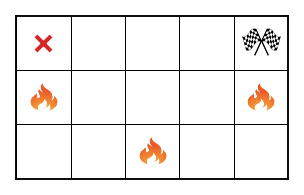

In [13]:
from utils import Maze

env = Maze(height=3, width=5)
env.plot();

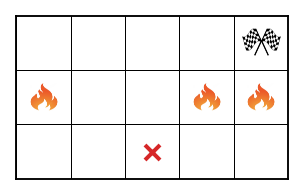

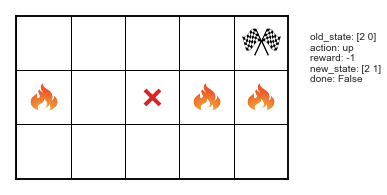

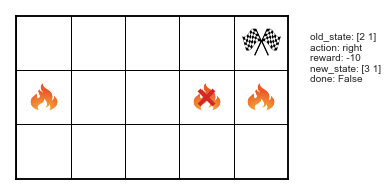

In [3]:
# Take some actions
env.plot()
env.step(action='up')
env.plot()
env.step(action='right')
env.plot();

<h3>RL definitions</h3>

- **State:** player / agent position (<a style="color: #ff0000;"> <strong>x</strong> </a>) whose coordinates are defined by a tuple $(x, y)$
- **Action:** 'up', 'down', 'left', 'right'
- **Reward:** every action comes with a reward, depending on the new state we end up in
    - Taking a step into an empty field: -1
    - Bumping into walls: -5
    - Going through fire: -10
    - Reaching the goal: +30

<h2>RL is about taking the best decisions ... </h2>

- Obviously there are **better and worse trajectories to reach the target**. "Better" and "worse" refer to **how much reward** we can collect along the way.
- We will get back to that

<p style="color: #e6541a;"> <strong>Exercise 1</strong> </p>
Using the reward definitions from the previous slide, try to calculate the cumulative rewards for the trajectories shown below. Can you tell which of the paths are equally good / bad?

<center>

<img src="img/example_trajectories.png" alt="Example trajectories" style="width: 35%;" />
    
</center>

<p style="color: #e6541a;"> <strong> TO DO </strong> </p>

<h2>Compare here the different methods</h2>

- If we have a model, could solve analytically with dynamic programming
- If we do not have a model, can use e.g. Monte Carlo methods, sampling entire trajectories of the graph from start to end
- Reinforcement learning takes a different approach and uses sub-trajectories to update the ...

<div style="text-align: center; width:100%;">
    <h2>Part II: reinforcement learning formalism</h2>
</div>

<h3>Markov process</h3>

- A **memoryless random process** consisting of a **set of states $S$ and state transition probabilities**
- **Markov property:** the process is memoryless, i.e. the future depends only on the present state, but not on how we got there.

<center>

<img src="img/markov_chain.png" alt="Markov chain" style="width: 45%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf">D. Silver - Lecture on RL</a></p>
    
</center>

$S = \{\text{Class 1, Class 2, Class 3, Facebook, Pub, Pass, Sleep}\}$  
*Note that "Sleep" is also called a **terminal state**, because once in it we will never leave it.*

<h3>Markov reward process</h3>

- A Markov process that has in addition a **reward function** and a **discount factor** $\gamma \in [0, 1]$
- **Return** $G_t$: sum of discounted future rewards

$$G_t = \sum_k \gamma^k \, r_{t+k}$$

- $\gamma$ controls the relative importance of immediate vs future rewards
    - $\gamma \rightarrow 0$: we only care about immediate rewards
    - $\gamma \rightarrow 1$: we care about rewards far in the future

<center>
    
<img src="img/markov_reward_process.png" alt="Markov reward process" style="width: 50%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf">D. Silver - Lecture on RL</a></p>
    
</center>

<h3>Markov decision process (MDP)</h3>

- Extend Markov reward process by adding **decision making**: set of possible actions $A$ (= action space)

<center>
    
<img src="img/markov_decision_process.png" alt="Markov decision process" style="width: 50%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf">D. Silver - Lecture on RL</a></p>
    
</center>


<br> *Note that stochastic state transitions are still allowed (whenever we decide to go to the Pub, anything can happen).*  
*Today we will work with fully deterministic MDPs only.*

- **Episodic MDP**
    - Each episode ends in a terminal state
    - Return $G_t$ is the sum of discounted rewards collected from time $t$ till end of episode
    - Episodes are independent


- **Continuous MDP**
    - Continues indefinitely: has no terminal states
    - Very important that discount factor $\gamma < 1$ to avoid infinite returns
    - Also known as infinite horizon MDP

<h3>Policy $\pi$</h3>

- The policy defines the decision making or **behavior of the agent**
- It is a **probability distribution over the state-action space**. You can also think of it as a mapping that assigns to each state-action pair $(s, a)$ a probability

$$\pi: S \times A \rightarrow [0, 1]$$


- $S$ and $A$ are the state and action spaces, respectively
    - For our maze: $S = \{[0, 0], [0, 1], ..., [\text{width}-1, \text{height}-1]\}$ and $A = \{\text{'up', 'down', 'left', 'right'}\}$.

<p style="color: #e6541a;"> <strong>Exercise 2</strong> </p>

Let's get back to the maze! For now we do not care about optimal decisions. Instead, try to **implement a random policy**, i.e. every action $a \in \{\text{'up', 'down', 'left', 'right'}\}$ is picked with equal probability no matter what state the agent is in.

**a)** Initialize a Maze with `height=3, width=2` and complete the `all_actions` list.

**b)** Look at every step of the output: is the movement of the agent (<a style="color: #ff0000;"> <strong>x</strong> </a>) and the rewards obtained consistent with your expectations?

In [ ]:
env = Maze(# FILL IN HERE)
env.plot(title='Initial state')

all_actions = ['up', # ... FILL IN HERE]

done = False
while not done:
    action = np.random.choice(all_actions)
    state, action, reward, new_state, done = env.step(action)
    env.plot();

<h2>RL objective</h2>

- **Find optimal behavior in a given environment:** in every state we want the agent to take the best action
- This is also known as the **optimal policy** $\pi^*$
- Formally, $\pi^*$ **maximizes the return** $G_t = \sum_k \gamma^k \, r_{t+k}$, i.e. the cumulative sum of discounted future rewards.

- **For our maze, RL will solve ...**
    - For any given field that we are currently on (= state), what is the action that maximizes the sum of rewards collected over time?
    - Or: from where I stand - how can I reach the target field with the **least steps and not going through fires** (if possible) ?

<h2>RL taxonomy</h2>

- There are many **different algorithms** for finding the optimal policy $\pi^*$
- They all have their pros and cons
    - Often the **sample-efficiency** is crucial
    - It tells us **how many interactions with the environment** (= how many data samples) we need to solve the RL problem
    - E.g. for **accelerator systems**: we want to train the agent with **as little beam time as possible** as it is very expensive
    
    
- **Today:** we are going to look at **Q-learning**. It is one of the **core ideas** of many RL algorithms, such as
    - Deep Q-learning (DQN)
    - Actor-critic methods (DDPG, TD3, SAC)

<center>

<img src="img/rl_taxonomy.png" alt="The RL algorithm zoo" style="width: 55%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html">Open AI - Spinning Up</a></p>
    
</center>

<center>

<img src="img/sample_efficiency.png" alt="Sample efficiency" style="width: 70%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image adapted from <a href="https://rail.eecs.berkeley.edu/deeprlcourse/">S. Levine, "Deep Reinforcement Learning" (lecture)</a></p>
    
</center>

<h2 style="color: #b51f2a">Intermediate summary</h2>

- The goal of RL is to **make optimal decisions** (*take actions*) in an environment based on some observables (*state*)
- **Example environments:** game, control system (e.g. fusion reactor, tuning accelerator parameters), trading, ...
- The **quality of a decision** made is quantified by a **reward**
- Through **trial-and-error** the RL agent collects rewards and can eventually learn the **best behavior** (*optimal policy* $\pi^*$)
- Formally this is described as a **Markov decision process (MDP)**


<div style="text-align: center; width:100%;">
    <h2>Part III: Q-learning</h2>
</div>

<h2>Q-learning</h2>

- Employs a **state-action value function**
$$Q: S \times A \rightarrow \mathbb{R}$$
to solve the RL problem


- The Q-value $Q(s, a)$ characterizes the **"quality" of the state-action pair** $(s, a)$
    - Quality is measured as the **expected return** acting according to a certain policy
    $$Q(s, a) = \mathbb{E}[G_t | S_t = s, A_t = a]$$
    - Reminder: $G_t = \sum_k \gamma^k \, r_{t+k}$

- **Temporal difference (TD)**
    - We can write the Q-value of $(s, a)$ as a sum of immediate reward $r$ plus discounted Q-value of the next state-action pair $(s', a')$
    - *N.B.: we are acting greedily, hence the $\text{max}$ operation*

<center>

<img src="img/backup_diag_qlearn.png" alt="Q-learning backup diagram" style="width: 60%; margin-top: 1cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
    
</center>

- **Temporal difference (TD) rule**
    - Q-values are initially unknown / random, but can be learned **iteratively** following the TD update rule

$$Q(s, a) \leftarrow Q(s, a) + \alpha \underbrace{[\underbrace{r + \gamma \text{max}_{a'} \, Q(s', a')}_{\text{target}} - \underbrace{Q(s, a)}_{\text{current prediction}}]}_{\text{TD error}},$$
<p style="margin-left: 60px;"> where $\alpha$ is the learning rate</p>

- Uses **trial-and-error experiences** collected by the agent in one step $(s, a, r, s')$: *state, action, reward, next state*.
- This is the **core idea of Q-learning** and is a result of one of the Bellman equations

<h2>Obtaining the optimal policy</h2>

- Once Q-values have converged, it is easy to read off the optimal policy $\pi^*$

$$
\pi^*(s, a) = \left\{
    \begin{array}{ll}
        1 & \mbox{if } a = \text{argmax}_{a'} \, Q(s, a') \\
        0 & \mbox{otherwise.}
    \end{array}
\right.
$$

- This is also known as the **greedy policy**: it acts greedily in terms of expected return by assigning probability $1$ to the action that maximizes the Q-function.

<h2>How to implement Q-learning?</h2>

- We need a way to track and update the Q-values for each state-action pair
    - Traditional Q-learning: **Q-table**
    - Deep Q-learning: **neural network**


- Let's try both!


- RL challenges
    - Reward engineering
    - Definition of the state, which is sometimes only partially observable
    - Hyperparameter tuning, making training stable

<center>

<img src="img/qlearn_dqn.png" alt="Q-learning vs DQN" style="width: 45%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.assemblyai.com/blog/reinforcement-learning-with-deep-q-learning-explained/">AssemblyAI</a></p>

</center>

<h3>Exploration-exploitation trade-off</h3>

- To learn the best policy in the most efficient manner, we need a **trade-off between exploration and exploitation**.
- We have to **ensure that the agent keeps exploring** new actions during training and does not just always follow the path that provides the highest expected return
- After all, Q-values might **not have converged yet**, there may still be better solutions than currently known

<center>

<img src="img/exploration_exploitation_tradeoff.jpg" alt="Exploration-exploitation tradeoff" style="width: 40%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://inst.eecs.berkeley.edu/~cs188/sp20/assets/lecture/lec15_6up.pdf">Berkeley AI course</a></p>

</center>

<h2>Q-learning with lookup table</h2>

- The first Q-learning method we consider is using a **lookup table** to keep track of the Q-values during training
- First, we **initialize** all Q-values **to 0**, then **update** the values according to the **TD rule**
- *N.B.: this method works only for discrete sets of states and actions*

<center>

<img src="img/qtable.png" alt="Q-table learning" style="width: 80%;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"></p>

</center>

Initial Q-table
+--------+-----+------+------+-------+
| s \ a  |  up | down | left | right |
+--------+-----+------+------+-------+
| (0, 0) | 0.0 | 0.0  | 0.0  |  0.0  |
| (0, 1) | 0.0 | 0.0  | 0.0  |  0.0  |
| (1, 0) | 0.0 | 0.0  | 0.0  |  0.0  |
| (1, 1) | 0.0 | 0.0  | 0.0  |  0.0  |
+--------+-----+------+------+-------+


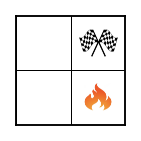

In [2]:
from plot_utils import print_qtable
from utils import Maze, QLearner

np.random.seed(0)

# Initialize small maze environment
env = Maze(width=2, height=2, fire_positions=[[1, 0]])
_ = env.plot(add_player_position=False)

# Initialize Q-learner with Q-table
qtable_learner = QLearner(env, q_function='table')

print('Initial Q-table')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)

In [3]:
qtable_learner.train(200)

print('Q-table after 200 episodes')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)


Q-table after 200 episodes
+--------+------+------+------+-------+
| s \ a  |  up  | down | left | right |
+--------+------+------+------+-------+
| (0, 0) | 19.9 | 7.8  | 7.9  |  7.1  |
| (0, 1) | 14.8 | 11.0 | 14.1 |  26.6 |
| (1, 0) | 22.0 | 5.0  | 8.7  |  4.4  |
| (1, 1) | 0.0  | 0.0  | 0.0  |  0.0  |
+--------+------+------+------+-------+


In [4]:
qtable_learner.train(300)

print('Q-table after 500 episodes')
q_table = qtable_learner.q_func.get_q_table()
print_qtable(q_table)


Q-table after 500 episodes
+--------+------+------+------+-------+
| s \ a  |  up  | down | left | right |
+--------+------+------+------+-------+
| (0, 0) | 28.3 | 22.0 | 22.0 |  17.4 |
| (0, 1) | 23.8 | 25.8 | 24.1 |  29.9 |
| (1, 0) | 28.8 | 15.9 | 23.8 |  15.7 |
| (1, 1) | 0.0  | 0.0  | 0.0  |  0.0  |
+--------+------+------+------+-------+


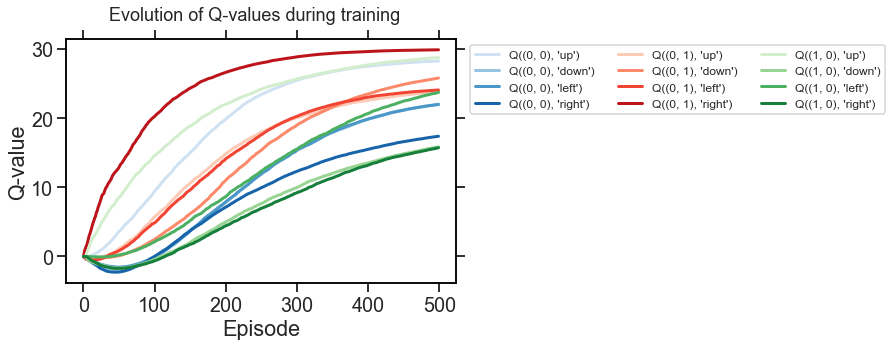

In [5]:
qtable_learner.plot_training_evolution()

<p style="color: #e6541a;"> <strong>Exercise 3</strong> </p>

**a)** Based on the evolution of the Q-values on the previous slide - would you consider the training to be complete after 500 episodes?

**b)** Play with the number of episodes in the cell below until you find convergence.

In [16]:
from plot_utils import print_qtable
from utils import Maze, QLearner

np.random.seed(0)
env = Maze(width=2, height=2, fire_positions=[[1, 0]])

qtable_learner = QLearner(env, q_function='table')
qtable_learner.train(# FILL IN HERE #)
qtable_learner.plot_training_evolution()

SyntaxError: unexpected EOF while parsing (<ipython-input-16-6b157f070cb6>, line 11)

<p style="color: #e6541a;"> <strong>Exercise 4</strong> </p>

**a)** Initialize a bigger maze `height=4`, `width=3`, with `fire_positions=[[2, 1], [2, 2]]` and use `q_function='table'` in the `QLearner` class. Then train it for `5000` episodes. 

**b)** Once the training is finished, plot the Q-values (you can just execute the cell, it is already complete).
<br>*Next to each little arrow there is a number that denotes the Q-value of the corresponding action on that field. The red arrow indicates the action with the highest Q-value.*

**c)** Finally, also plot the (greedy) policy by executing the third cell. Compare it to the Q-value plot to verify that we indeed always pick the action with the highest Q-value. Are there fields where two actions would be equally good (which ones)? Can you confirm that by looking at the Q-values?

In [1]:
from utils import Maze, QLearner

env = Maze(width=4, height=3, fire_positions=[[2, 1], [2, 2]])
qtable_learner = QLearner(env, q_function='table')
qtable_learner.train(5000)

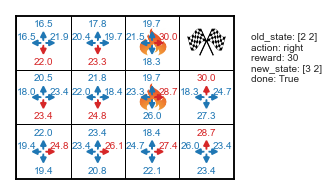

In [7]:
from plot_utils import plot_q_table

q_table = qtable_learner.q_func.get_q_table()
ax = env.plot(add_player_position=False)
plot_q_table(q_table, env.target_position, env.fire_positions, ax=ax)

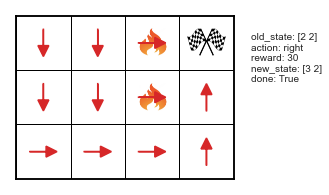

In [8]:
from plot_utils import plot_greedy_policy

policy = qtable_learner.q_func.get_greedy_policy()
ax = env.plot(add_player_position=False)
plot_greedy_policy(policy, env.target_position, env.fire_positions, ax=ax)

<p style="color: #e6541a;"> <strong>Exercise 5</strong> (optional)</p>

**a)** Using the same maze as above, reduce the punishment of going through fire by setting a `fire_reward=-2` (instead of -10) in the environment definition.

**b)** Retrain the agent. How does the policy change compared to exercise 4? Can you explain why?

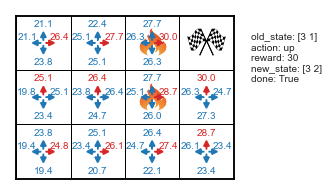

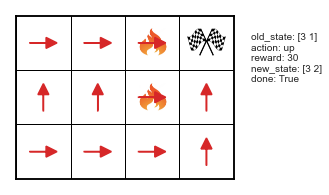

In [9]:
from utils import Maze, QLearner
from plot_utils import plot_q_table, plot_greedy_policy

# Env definition
env = Maze(width=4, height=3, fire_positions=[[2, 1], [2, 2]], fire_reward=-2)
qtable_learner = QLearner(env, q_function='table')
qtable_learner.train(5000)

# Show Q-values
q_table = qtable_learner.q_func.get_q_table()
ax = env.plot(add_player_position=False)
plot_q_table(q_table, env.target_position, env.fire_positions, ax=ax)

# Show policy
policy = qtable_learner.q_func.get_greedy_policy()
ax = env.plot(add_player_position=False)
plot_greedy_policy(policy, env.target_position, env.fire_positions, ax=ax)

<h2>Deep Q-learning (DQN)</h2>

- **Main idea:** replace the Q-table by a simple, feed-forward neural network (Q-net)
- Developed by DeepMind in 2013 to play Atari games *(<a href="https://arxiv.org/abs/1312.5602">DQN paper</a>)*


- A neural network (NN) is a **universal function approximator**, i.e. a fit model that can approximate any function (in theory)
- The Q-net is a **mapping** from **state to Q-values** of all possible actions
- Its parameters aka. weights are adjusted according to the **TD rule**, like the Q-table


<center>

<img src="img/qnet_neuron.png" alt="Q-net" style="width: 90%; margin-top: 0.5 cm;" />
<p style="clear: both; font-size: 10pt; text-align: right; float: right;"></p>

</center>

<p style="color: #e6541a;"> <strong> Exercise 6</strong> </p>

**a)** Repeat the same steps as above for the Q-table learner, but this time using `q_function='net'` as an argument in the `QLearner` class. Train it for `2000` episodes. This will take a couple of minutes.

**b)** Compare the Q-values and policy to the one obtained with Q-table learning. Do you see differences? Why could that be?

In [12]:
from utils import Maze, QLearner

env = Maze(width=4, height=3, fire_positions=[[2, 1], [2, 2]])
qnet_learner = QLearner(env, q_function='net')
qnet_learner.train(2000)

100%|██████████| 2000/2000 [02:31<00:00, 13.19it/s]


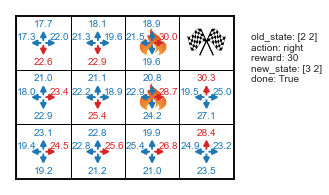

In [13]:
from plot_utils import plot_q_table

q_table = qnet_learner.q_func.get_q_table()
ax = env.plot(add_player_position=False)
plot_q_table(q_table, env.target_position, env.fire_positions, ax=ax)

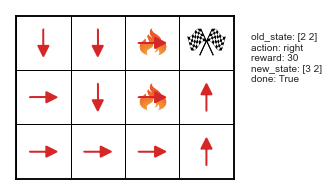

In [14]:
from plot_utils import plot_greedy_policy

policy = qnet_learner.q_func.get_greedy_policy()
ax = env.plot(add_player_position=False)
plot_greedy_policy(policy, env.target_position, env.fire_positions, ax=ax)

<h2>Q-table vs DQN: pros, cons, and limitations</h2>

- **Q-table**
    - <p style="color: #008000;">Easy to understand and validate</p>
    - <p style="color: #A91E1E;">Discrete $S$, $A$ spaces only</p>
    - <p style="color: #A91E1E;">Relatively small $S$, $A$ spaces only</p>

    
- **DQN**
    - <p style="color: #008000;">Big and continuous $S$ possible</p>
    - <p style="color: #008000;">No need to visit all states during training, because NNs are great interpolators</p>
    - <p style="color: #A91E1E;">Discrete and relatively small $A$</p>
    - <p style="color: #A91E1E;">Training may be unstable and harder to verify if we have reached convergence</p>
    
    
    
- Many real-world problems require **continuous $S$ *and* continuous $A$** $\,\,\Rightarrow\,\,$ **actor-critic methods**


<div style="text-align: center; width:100%;">
    <h2>Part IV: actor-critic methods</h2>
</div>

<h2>Actor-critic scheme</h2>

- **Use two NNs**
    
- **Actor**
    - Represents the policy $\pi$ and is a mapping $\pi: S \rightarrow A$
    - For each **continuous state**, it proposes a **continuous action**
    - Learns from the critic
    
    
- **Critic**
    - Predicts Q-values and is a mapping $Q: S\times A \rightarrow \mathbb{R}$
    - Evaluates quality of $(s, a)$ pair proposed by critic
    - Feeds back to the actor network: policy gradient rule


*N.B.: networks are trained simultaneously*

<center>

<img src="img/actor_critic.png" alt="Actor-critic schematic" style="width: 70%;" />

</center>

- **Critic parameters** $\theta$ are updated according to the **TD rule**, just like in Q-learning
- **Actor parameters** $\chi$ are updated via **policy gradient**: for a given state $s$, how does the actor have to adjust its parameters to propose an action $a$ such that $Q(s,a)$ becomes larger?

<h2>Application in accelerator physics</h2>


- We are going to consider a **trajectory steering problem** from CERN's **AWAKE**
- <a href="https://www.nature.com/articles/s41586-018-0485-4">Advanced Proton Driven Plasma Wakefield Acceleration Experiment</a>


<center>

<img src="img/awake.png" alt="AWAKE" style="width: 100%; margin-top: 1cm"/> <p style="clear: both; font-size: 10pt; text-align: right; float: right;">image by <a href="https://www.nature.com/articles/s41586-018-0485-4">AWAKE Collaboration</a></p>

</center>


<h3>AWAKE electron beam line</h3>

<center>

<img src="img/awake_beamline.png" alt="AWAKE beamline" style="width: 50%; margin-top: 1cm;"/>
    
</center>

<h3>RL task definitions</h3>

- **Goal:** given measured beam positions (= continuous state), find best dipole corrector settings (= continuous actions) to keep beam close to the center of vacuum pipe


- **State:** 10-d array of beam positions measured along the line
- **Action:** 10-d array of dipole corrector strengths along the line
- **Reward:** negative rms of beam offsets wrt. center


<center>

<img src="img/trajectory_task.png" alt="Electron beam line steering task" style="width: 50%; margin-top: 0.5cm;"/>
    
</center>

<p style="color: #e6541a;"> <strong> Exercise 7</strong> </p>

**Let's try to train an actor-critic agent on the AWAKE environment!** We are using the **DDPG** *(<a href="https://spinningup.openai.com/en/latest/algorithms/ddpg.html">Deep Deterministic Policy Gradient</a>)* algorithm. It is one of the most basic actor-critic algorithms and hence also not the most stable one. Some improvements have been implemented in TD3.

**a)** Run the following cell to initialize the AWAKE simulation environment `env` and a DDPG instance `agent`. Then reset the environment to initialize it, and plot the trajectory. The plot shows the beam position at the 10 BPMs installed along the electron beam line.

**b)** Run the next cell to make a correction to the beam position (using the function `run_correction(env, agent)`). Run the cell multiple times and check how the trajectories before and after correction compare. Do you think the RL agent is doing a good job? Why or why not?

**c)** Run the next cell to train the RL agent. Can you interpret the output plots showing evolution of agent training? Is the length of training appropriate or should we train with fewer / more steps?

**d)** Check a few trajectories before and after correction now using the trained agent. How does it perform now?

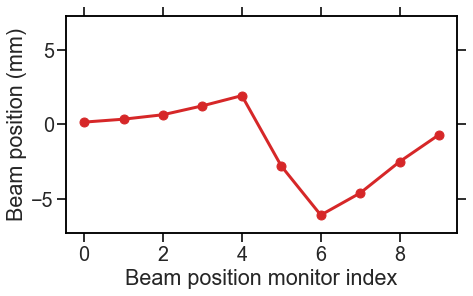

In [2]:
# Exercise 7 a)
from awake_env.awake_env import e_trajectory
from actor_critic import ClassicalDDPG, trainer, plot_training_log, run_correction

env = e_trajectory()
agent = ClassicalDDPG(state_space=env.observation_space, action_space=env.action_space)

env.reset(init_outside_threshold=True)
env.plot_trajectory()

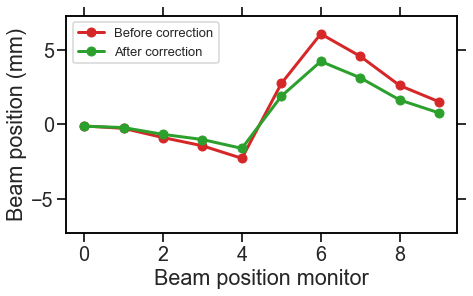

In [6]:
# Exercise 7 b)
run_correction(env, agent)

EPISODE: 0, INITIAL REWARD: -82.36, FINAL REWARD: -88.394, #STEPS: 15.
EPISODE: 50, INITIAL REWARD: -28.797, FINAL REWARD: -43.098, #STEPS: 1.
EPISODE: 100, INITIAL REWARD: -172.277, FINAL REWARD: -63.27, #STEPS: 1.
EPISODE: 150, INITIAL REWARD: -202.127, FINAL REWARD: -16.446, #STEPS: 1.
EPISODE: 200, INITIAL REWARD: -25.679, FINAL REWARD: -37.883, #STEPS: 1.


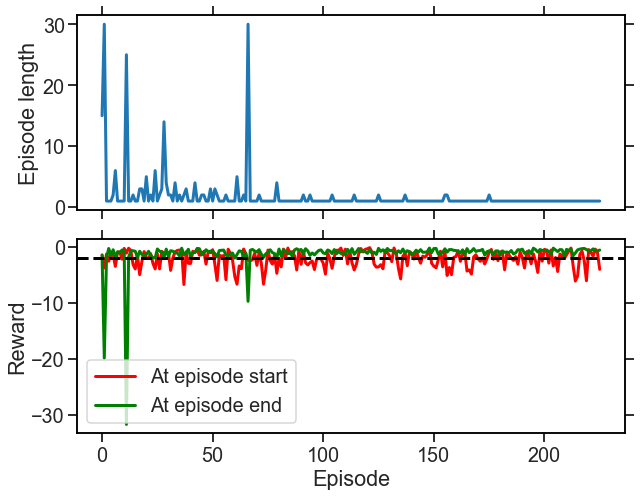

In [7]:
# Exercise 7 c)
training_log = trainer(env=env, agent=agent, n_steps=400)
plot_training_log(env, agent, training_log)

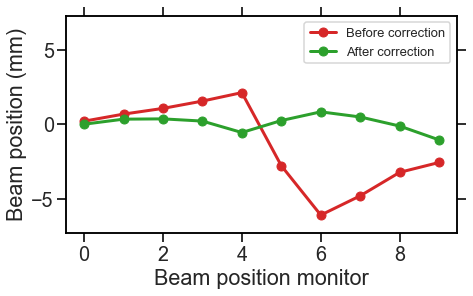

In [13]:
# Exercise 7 d)
run_correction(env, agent)

<p style="color: #e6541a;"> <strong> TO DO </strong> </p>

<h2>Summary</h2>

- ... all contents as relevant for the exam

<p style="color: #e6541a;"> <strong> TO DO: try to make simpler questions </strong> </p>

<h2>Comprehension questions</h2>

- Is the Markov property fulfilled for our maze environment? Why, or why not?
- Do you have to increase or decrease the discount factor $\gamma$ to put more emphasis on future rewards?
- Why does Q-learning only work for discrete action spaces?
- Why might some of the Q-table values converge earlier than others?
- How can you obtain the optimal policy once you know the Q-values?

<h2>Literature</h2>

- R.S. Sutton and A.G. Barto, <a href="http://incompleteideas.net/book/RLbook2020.pdf">"Reinforcement learning - an introduction"</a>, Book, 2nd edition, 2020.
- S. Levine, <a href="https://rail.eecs.berkeley.edu/deeprlcourse/">Deep Reinforcement Learning</a>, Lecture, UC Berkeley, 2022.
- D. Silver, <a href="https://www.davidsilver.uk/teaching/">Reinforcement learning</a>, Lecture, University College London (UCL), 2015.

<h2>Python RL libraries</h2>

- Stable baselines 3: <a href="https://github.com/DLR-RM/stable-baselines3">github</a>, <a href="https://stable-baselines3.readthedocs.io/en/master/">docs</a>
- OpenAI gym: <a href="https://github.com/openai/gym">github</a>, <a href="https://www.gymlibrary.dev/">docs</a>